# Project name!

<span style='background:mistyrose'>&nbsp;</span>&nbsp;

## About the dataset

#### Source:
[Wine quality dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality)

Two datasets are included, related to red and white wine samples from the demarcated region of *vinho verde* (northeast region of Portugal). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

Each sample was evaluated by a minimum of three sensory assessors (using blind tastes), which graded the wine in a scale that ranges from 0 (very bad) to 10 (excellent). The final sensory score is given by the *median* of these evaluations.

#### Attribute Information:    
##### &ensp;- Input variables (based on physicochemical tests):    
&ensp;`fixed acidity` (tartaric acid - g$\cdot$dm<sup>-3</sup>):<br>
&ensp;&ensp;acidity is a fundamental property of wine, imparting sourness and resistance to microbial infection<br>
&ensp;`volatile acidity` (acetic acid - g$\cdot$dm<sup>-3</sup>):<br>
&ensp;&ensp;Wine spoilage is legally defined by volatile acidity, largely composed of acetic acid<br>
&ensp;`citric acid` (g$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`residual sugar` (g$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`chlorides` (sodium chloride - g$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`free sulfur dioxide` (mg$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`total sulfur dioxide` (mg$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`density` (g$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`pH`:<br>
&ensp;&ensp;Typical pH levels in wine normally range from 2.9 to 3.9<br>
&ensp;`sulphates` (potassium sulphate - g$\cdot$dm<sup>-3</sup>)<br>
&ensp;&ensp;description<br>
&ensp;`alcohol` (% by volume)<br>
&ensp;&ensp;description

##### &ensp;- Output variable (based on sensory data):    
&ensp;&ensp;`quality` (score between 0 and 10)


#### Main goal:
Model wine quality based on physicochemical tests

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import ttest_ind, kruskal, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm
# from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


%config Completer.use_jedi = False
%matplotlib inline

## Load the data

In [2]:
red_wine = pd.read_csv('Wine quality/winequality-red.csv', sep=";")
white_wine = pd.read_csv('Wine quality/winequality-white.csv', sep=";")

# Add a tag to identify each type on a combined dataset
# red_wine['type'] = 'red'
# white_wine['type'] = 'white'

In [74]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Both datasets have consistent columns, all columns are numerical (except for `type` that we just added) **(check if this is necessary)** and there are no missing values. Let's concatenate them in a single dataframe.

In [3]:
wine_df = pd.concat([red_wine, white_wine]).reset_index(drop=True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Before we proceed, let's just convert the column names to camel case

In [4]:
red_wine.columns = [x.replace(' ', '_') for x in red_wine.columns]
white_wine.columns = [x.replace(' ', '_') for x in white_wine.columns]
wine_df.columns = [x.replace(' ', '_') for x in wine_df.columns]

wine_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Exploratory data analysis

In [78]:
wine_df.describe().round(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


**Some insights about the data:**<br>

&ensp;- `residual sugar` has a wide range of values [0.600, 65.8]. It might have to do with wines being dry or sweet.    
&ensp;- For the `quality`, there are no values with score lower than 3 and no wines received the maximum score (10). We could further categotize them.    
&ensp;- Based on common knowledge about wines, the other values seem plausible.

In [79]:
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Based on what we have so far, we could try answering some questions:

1. Is there a difference in the average quality of red and white wine?
2. What are the variables that influence the quality of the wine? Are they the same for both types?
3. What's the best regression model for the data? Is it best to apply the model to each data separately?
> More questions?

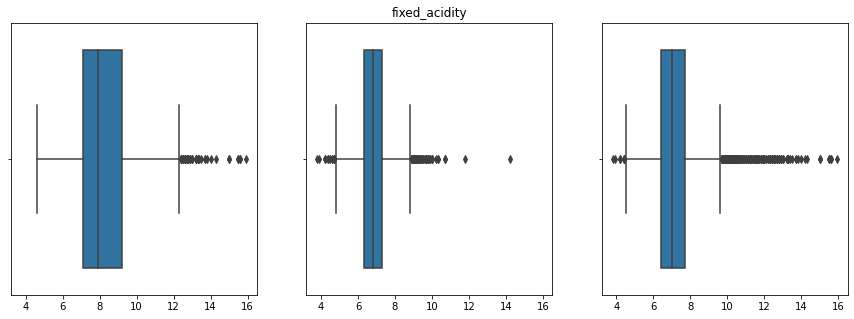

In [357]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
#fig.tight_layout(h_pad=5, w_pad=0.8)
#fig.delaxes(ax[3,2])

color = sns.color_palette('tab10', n_colors=3)

sns.boxplot(x='fixed_acidity', data=red_wine, color=color[0], ax=ax[0]).set(xlabel=None)
sns.boxplot(x='fixed_acidity', data=white_wine, color=color[0], ax=ax[1]).set(title='fixed_acidity', xlabel=None)
sns.boxplot(x='fixed_acidity', data=wine_df, color=color[0], ax=ax[2]).set(xlabel=None)

#sns.boxplot(x='volatile_acidity', data=wine_df, color=color[1], ax=ax[0,1])
#sns.boxplot(x='citric_acid', data=wine_df, color=color[2], ax=ax[0,2])
#sns.boxplot(x='residual_sugar', data=wine_df, color=color[3], ax=ax[1,0])
#sns.boxplot(x='chlorides', data=wine_df, color=color[4], ax=ax[1,1])
#sns.boxplot(x='free_sulfur_dioxide', data=wine_df, color=color[5], ax=ax[1,2])
#sns.boxplot(x='total_sulfur_dioxide', data=wine_df, color=color[6], ax=ax[2,0])
#sns.boxplot(x='density', data=wine_df, color=color[7], ax=ax[2,1])
#sns.boxplot(x='pH', data=wine_df, color=color[8], ax=ax[2,2])
#sns.boxplot(x='sulphates', data=wine_df, color=color[9], ax=ax[3,0])
#sns.boxplot(x='alcohol', data=wine_df, color=color[10], ax=ax[3,1])

plt.show()

In [81]:
def outliers_count(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range
    
    # An array of booleans where the True values represent the outliers
    outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    
    # As True values are interpreted as 1, the sum() returns the number of outliers
    return outliers.sum()

In [82]:
for c in wine_df.columns:
    print(c, outliers_count(wine_df, c))

fixed_acidity 357
volatile_acidity 377
citric_acid 509
residual_sugar 118
chlorides 286
free_sulfur_dioxide 62
total_sulfur_dioxide 10
density 3
pH 73
sulphates 191
alcohol 3
quality 228


In [83]:
def outliers_count_1pct(df, column):
    
    Q1 = df[column].quantile(0.01)
    Q99 = df[column].quantile(0.99)
        
    # An array of booleans where the True values represent the outliers
    outliers = df[column] > Q99
    
    # As True values are interpreted as 1, the sum() returns the number of outliers
    return outliers.sum()

In [84]:
for c in wine_df.columns:
    print(c, outliers_count_1pct(wine_df, c))

fixed_acidity 60
volatile_acidity 62
citric_acid 29
residual_sugar 63
chlorides 65
free_sulfur_dioxide 62
total_sulfur_dioxide 61
density 58
pH 64
sulphates 63
alcohol 55
quality 5


> What to do with the outliers? Are they really outliers? Seaborn boxplot and histograms give different perspectives.

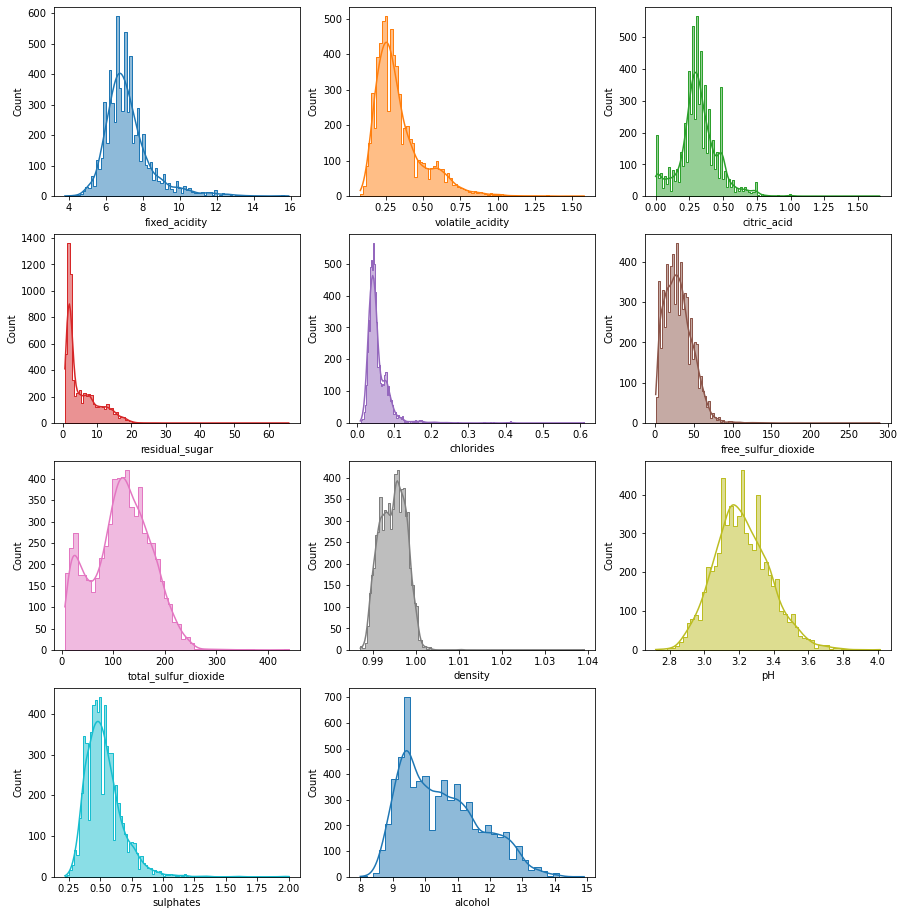

In [85]:
fig, ax = plt.subplots(4,3, figsize=(15,16))
#fig.tight_layout(h_pad=5, w_pad=0.8)
fig.delaxes(ax[3,2])

color = sns.color_palette('tab10', n_colors=11)

sns.histplot(x='fixed_acidity', data=wine_df, color=color[0], ax=ax[0,0], kde=True, element='step')
sns.histplot(x='volatile_acidity', data=wine_df, color=color[1], ax=ax[0,1], kde=True, element='step')
sns.histplot(x='citric_acid', data=wine_df, color=color[2], ax=ax[0,2], kde=True, element='step')
sns.histplot(x='residual_sugar', data=wine_df, color=color[3], ax=ax[1,0], kde=True, element='step')
sns.histplot(x='chlorides', data=wine_df, color=color[4], ax=ax[1,1], kde=True, element='step')
sns.histplot(x='free_sulfur_dioxide', data=wine_df, color=color[5], ax=ax[1,2], kde=True, element='step')
sns.histplot(x='total_sulfur_dioxide', data=wine_df, color=color[6], ax=ax[2,0], kde=True, element='step')
sns.histplot(x='density', data=wine_df, color=color[7], ax=ax[2,1], kde=True, element='step')
sns.histplot(x='pH', data=wine_df, color=color[8], ax=ax[2,2], kde=True, element='step')
sns.histplot(x='sulphates', data=wine_df, color=color[9], ax=ax[3,0], kde=True, element='step')
sns.histplot(x='alcohol', data=wine_df, color=color[10], ax=ax[3,1], kde=True, element='step')

plt.show()

In [86]:
#sns.pairplot(wine_df)

In [87]:
# corr = red_wine.corr() # returns a dataframe with the correlation values
# matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)
# 
# fig, ax = plt.subplots(1,1, figsize=(12,12))
# 
# sns.heatmap(
#     corr,  # the data for the heatmap
#     annot=True,  # show the actual values of correlation
#     cmap='seismic',  # provide the 'seismic' colormap
#     center=0,  # specify the value at which to center the colormap
#     fmt='.2g', # specify the format for the annotation 
#     mask=matrix # hides the values where mask = True (= upper triangle)
#            )
# plt.show()

In [88]:
# corr = white_wine.corr() # returns a dataframe with the correlation values
# matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)
# 
# fig, ax = plt.subplots(1,1, figsize=(12,12))
# 
# sns.heatmap(
#     corr,  # the data for the heatmap
#     annot=True,  # show the actual values of correlation
#     cmap='seismic',  # provide the 'seismic' colormap
#     center=0,  # specify the value at which to center the colormap
#     fmt='.2g', # specify the format for the annotation 
#     mask=matrix # hides the values where mask = True (= upper triangle)
#            )
# plt.show()

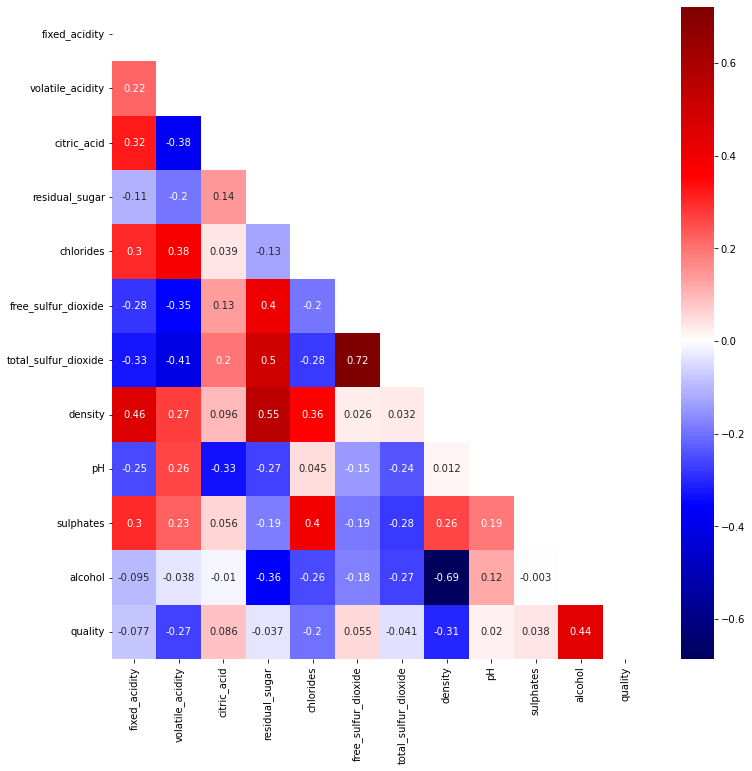

In [89]:
corr = wine_df.corr() # returns a dataframe with the correlation values
matrix = np.triu(corr) # sets all the values of the lower triangle (under the main diagonal) to 0 (= False)

fig, ax = plt.subplots(1,1, figsize=(12,12))

sns.heatmap(
    corr,  # the data for the heatmap
    annot=True,  # show the actual values of correlation
    cmap='seismic',  # provide the 'seismic' colormap
    center=0,  # specify the value at which to center the colormap
    fmt='.2g', # specify the format for the annotation 
    mask=matrix # hides the values where mask = True (= upper triangle)
           )
plt.show()

In [279]:
# sns.clustermap(corr)

### Red or white: which is better?

The mean, median and standard deviations for the `quality` are:

```python
# White wine
white_wine['quality'].mean(), white_wine['quality'].std(), white_wine['quality'].median()
>> (5.87790935075541, 0.8856385749678454, 6.0)

# Red wine
red_wine['quality'].mean(), red_wine['quality'].std(), red_wine['quality'].median()
>> (5.6360225140712945, 0.8075694397347023, 6.0)
```

To answer our question, let's set up a hypothesis test as follows:<br>

Null hypothesis - H<sub>0</sub>: $\mu$<sub>red</sub> = $\mu$<sub>white</sub><br>
Alternative hypothesis - H<sub>A</sub>: $\mu$<sub>red</sub> $\neq$ $\mu$<sub>white</sub><br>
Significance level: $\alpha$ = 0.05<br>

As we don't know the population's variance, we should apply a t-test on the means.

In [91]:
white_wine['quality'].mean(), white_wine['quality'].std(), white_wine['quality'].median()

(5.87790935075541, 0.8856385749678454, 6.0)

In [92]:
ttest_ind(white_wine['quality'], red_wine['quality'])

Ttest_indResult(statistic=9.685649554187696, pvalue=4.888069044201508e-22)

With p-value = 4.88$\cdot$10<sup>-22</sup> < $\alpha$ = 0.05, there's strong evidence against the null hypothesis. Therefore, the means are different and the white wines performed better than the red wines on average.

Kruskal-Wallis

H<sub>0</sub>: Median<sub>red</sub> $=$ Median<sub>white</sub><br>
H<sub>A</sub>: Median<sub>red</sub> $\neq$ Median<sub>white</sub><br>
$\alpha =$ 0.05<br>

In [93]:
kruskal(white_wine['quality'], red_wine['quality'])

KruskalResult(statistic=98.27897322693157, pvalue=3.6340426705992374e-23)

Chi-square

In [94]:
data_crosstab = pd.crosstab(red_wine['quality'],
                            white_wine['quality'], 
                            margins = False)
data_crosstab

quality,3,4,5,6,7,8,9
quality,,,,,,,
3,0,1,3,3,2,1,0
4,1,4,15,22,10,0,1
5,2,32,207,286,124,28,2
6,5,19,197,278,110,28,1
7,2,8,53,83,45,8,0
8,0,1,4,8,4,1,0


In [95]:
#_, p, _, _ = chi2_contingency(data_crosstab)
#p

## Modeling

## Linear regression

In [96]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [97]:
X_scaled = StandardScaler().fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=0)

In [99]:
model=LinearRegression()
model.fit(X_train, y_train)

features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
10,alcohol,0.314005
1,volatile_acidity,0.214490
3,residual_sugar,0.211905
7,density,0.172997
6,total_sulfur_dioxide,0.138472
9,sulphates,0.114128
5,free_sulfur_dioxide,0.100253
0,fixed_acidity,0.096663
8,pH,0.077096
4,chlorides,0.024278


In [100]:
model.coef_

array([ 0.09666312, -0.21449011, -0.01639747,  0.21190512, -0.02427815,
        0.10025295, -0.13847187, -0.1729969 ,  0.07709649,  0.11412805,
        0.31400492])

USE STATSMODEL TO DEFINE THE MOST IMPORTANT VARIABLES

In [101]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     193.9
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        08:41:32   Log-Likelihood:                -5762.1
No. Observations:                5197   AIC:                         1.155e+04
Df Residuals:                    5185   BIC:                         1.163e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8220      0.010    571.589      0.0

## Logistic regression

**Categorizing the quality score**<br>

We can set an arbitrary threshold to classify the wines into 'low quality' e 'high quality'.<br>
'Low quality': score lower than 6 - encoded as 0<br>
'High quality': score equal or higher than 6 - encoded as 1

RED WINE

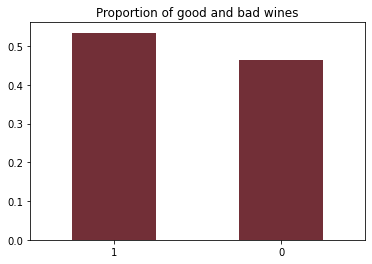

In [71]:
red_wine['quality_categorized'] = red_wine['quality'].apply(lambda x: 0 if x < 6 else 1)
red_wine['quality_categorized'].value_counts(normalize=True).plot.bar(rot=0, color='#722F37')
plt.title('Proportion of good and bad wines')
plt.show()

X/y split

In [91]:
X = red_wine.drop(['quality', 'quality_categorized'], axis=1)
y = red_wine['quality_categorized']

Train/test split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

Standardize data

In [93]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

Apply regression

In [94]:
#X_train_const = sm.add_constant(X_train_scaled)
log_reg = sm.Logit(y_train, X_train_scaled)
results = log_reg.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.524865
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 1279
Model:                           Logit   Df Residuals:                     1268
Method:                            MLE   Df Model:                           10
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2402
Time:                         12:58:57   Log-Likelihood:                -671.30
converged:                        True   LL-Null:                       -883.57
Covariance Type:             nonrobust   LLR p-value:                 5.590e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2372      0.186      1.278      0.201      -0.127       0.601
x2            -0.5958

Check model

In [109]:
# Add a constant
X_test_const = sm.add_constant(X_test_scaled)

# Return float values between 0 and 1, so we round and convert them to int
y_hat = results.predict(X_test_scaled).round().astype(int)  

# Performance metrics
accuracy = metrics.accuracy_score(prediction, y_test)
recall = metrics.recall_score(prediction, y_test)

print('Accuracy: {:.4f}\nRecall: {:.4f}'.format(accuracy, recall))

Accuracy: 0.7469
Recall: 0.7935


In [105]:
pd.DataFrame(confusion_matrix(prediction,y_test))

,0,1
0,116,49
1,32,123


In [40]:
#X_train_const = sm.add_constant(X_train_scaled)

#log_reg = sm.Logit(y_train, X_train_scaled)
#results = log_reg.fit()
#print(results.summary())

In [367]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='none')

In [370]:
y_hat = log_reg.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_hat,y_test)
recall = metrics.recall_score(y_hat,y_test)

(accuracy, recall)

(0.7625, 0.7926829268292683)

In [392]:
cm = pd.DataFrame(confusion_matrix(y_hat,y_test))
cm

,0,1
0,114,42
1,34,130


Define most important variables

Improve model

In [372]:
def model_improvement():
    
    columns_to_keep = X.columns[results.pvalues[1:] < 0.05]
    X_train, X_test, y_train, y_test = train_test_split(new_X_scaled, y, test_size=.20, random_state=0)
    new_X = X[columns_to_keep]
    new_X_scaled = StandardScaler().fit_transform(new_X)
    
    log_reg = LogisticRegression(penalty='none')
    log_reg.fit(X_train, y_train)
    y_hat = log_reg.predict(X_test)
    acc = metrics.accuracy_score(y_hat,y_test)
    cm = confusion_matrix(y_hat,y_test)
       
    return acc, pd.DataFrame(cm), new_X, X_train

In [393]:
#def performance_metrics():
#    
#    y_hat = log_reg.predict(X_test)
#    acc = metrics.accuracy_score(y_hat,y_test)
#    recall = metrics.recall_score(y_hat,y_test)
#    cm = confusion_matrix(y_hat,y_test)

In [294]:
# Removing variables with p > 0.05:

acc, cm, X, X_train = model_improvement()

In [295]:
acc, cm

(0.75625,
      0    1
 0  106   36
 1   42  136)

In [296]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.524872
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 1279
Model:                           Logit   Df Residuals:                     1272
Method:                            MLE   Df Model:                            6
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2402
Time:                         10:21:25   Log-Likelihood:                -671.31
converged:                        True   LL-Null:                       -883.57
Covariance Type:             nonrobust   LLR p-value:                 1.487e-88
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2541      0.069      3.701      0.000       0.120       0.389
x1            -0.5717

In [297]:
acc, cm, X, X_train = model_improvement()

In [298]:
#decreased from the last iteration
acc

0.753125

In [299]:
cm

,0,1
0,108,39
1,40,133


In [300]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.525333
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 1279
Model:                           Logit   Df Residuals:                     1273
Method:                            MLE   Df Model:                            5
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2396
Time:                         10:21:26   Log-Likelihood:                -671.90
converged:                        True   LL-Null:                       -883.57
Covariance Type:             nonrobust   LLR p-value:                 2.751e-89
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2565      0.069      3.739      0.000       0.122       0.391
x1            -0.5181

In [301]:
X.columns[results.pvalues[1:] < 0.05]

Index(['volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

In [302]:
results.params[1:].values

array([-0.51810895, -0.22069409, -0.40723829,  0.465475  ,  0.91488436])

<AxesSubplot:xlabel='Importance', ylabel='Attribute'>

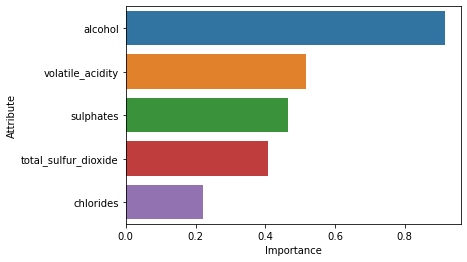

In [303]:
a = results.params[1:].values

features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(a)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)


sns.barplot(x = 'Importance', y = 'Attribute', data = features_importances)

In [304]:
metrics.recall_score(y_hat,y_test)

0.7705882352941177

WHITE WINE

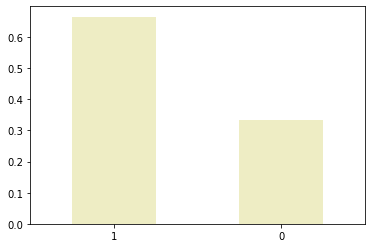

In [391]:
white_wine['quality_categorized'] = white_wine['quality'].apply(lambda x: 0 if x < 6 else 1)
white_wine['quality_categorized'].value_counts(normalize=True).plot.bar(rot=0, color='#EEEDC4')
plt.show()

In [306]:
X = white_wine.drop(['quality', 'quality_categorized'], axis=1)
y = white_wine['quality_categorized']

In [307]:
X_scaled = StandardScaler().fit_transform(X)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=0)

In [309]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [310]:
y_hat = log_reg.predict(X_test)

In [311]:
acc = metrics.accuracy_score(y_hat,y_test)
acc

0.7357142857142858

In [312]:
cm = confusion_matrix(y_hat,y_test)
pd.DataFrame(cm)

,0,1
0,166,70
1,189,555


USE STATSMODEL TO DEFINE THE MOST IMPORTANT VARIABLES

In [313]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.499944
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 3918
Model:                           Logit   Df Residuals:                     3906
Method:                            MLE   Df Model:                           11
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2099
Time:                         10:30:24   Log-Likelihood:                -1958.8
converged:                        True   LL-Null:                       -2479.1
Covariance Type:             nonrobust   LLR p-value:                3.599e-216
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9533      0.043     22.324      0.000       0.870       1.037
x1             0.0991

In [314]:
acc, cm, X, X_train = model_improvement()
acc

0.7306122448979592

In [315]:
cm

,0,1
0,163,72
1,192,553


In [316]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.500345
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 3918
Model:                           Logit   Df Residuals:                     3910
Method:                            MLE   Df Model:                            7
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2092
Time:                         10:30:28   Log-Likelihood:                -1960.4
converged:                        True   LL-Null:                       -2479.1
Covariance Type:             nonrobust   LLR p-value:                9.962e-220
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9555      0.043     22.391      0.000       0.872       1.039
x1            -0.6619

In [317]:
results.params[1:].values

array([-0.66187003,  0.8843138 ,  0.12370811, -0.87138817,  0.17557655,
        0.19563675,  0.86336541])

<AxesSubplot:xlabel='Importance', ylabel='Attribute'>

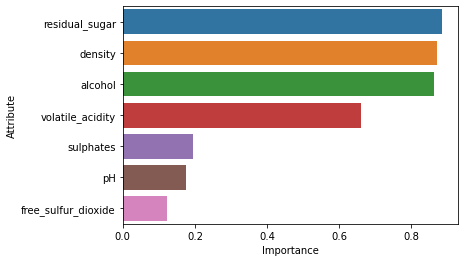

In [318]:
a = results.params[1:].values

features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(a)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x = 'Importance', y = 'Attribute', data = features_importances)

In [319]:
X.columns

Index(['volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [320]:
metrics.recall_score(y_hat,y_test)

0.7459677419354839

RED WINE: 'volatile_acidity', 'chlorides', 'total_sulfur_dioxide', 'sulphates', 'alcohol'<br>
WHITE WINE: 'volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol'

COMBINED

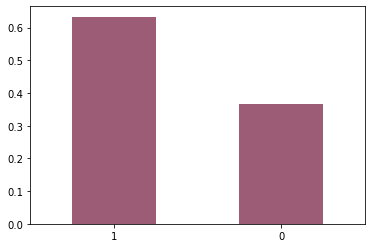

In [390]:
wine_df['quality_categorized'] = wine_df['quality'].apply(lambda x: 0 if x < 6 else 1)
wine_df['quality_categorized'].value_counts(normalize=True).plot.bar(rot=0, color='#9d5c75')
plt.show()

In [267]:
X = wine_df.drop(['quality', 'quality_categorized'], axis=1)
y = wine_df['quality_categorized']

In [268]:
X_scaled = StandardScaler().fit_transform(X)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=0)

In [270]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [272]:
y_hat = log_reg.predict(X_test)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [262]:
acc = metrics.accuracy_score(y_hat,y_test)
acc

0.7338461538461538

In [263]:
cm = confusion_matrix(y_hat,y_test)
pd.DataFrame(cm)

,0,1
0,254,132
1,214,700


In [264]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.515072
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 5197
Model:                           Logit   Df Residuals:                     5185
Method:                            MLE   Df Model:                           11
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2175
Time:                         09:36:45   Log-Likelihood:                -2676.8
converged:                        True   LL-Null:                       -3420.9
Covariance Type:             nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7480      0.036     20.889      0.000       0.678       0.818
x1             0.1757

In [273]:
acc, cm, X, X_train = model_improvement()
acc

0.7346153846153847

In [274]:
cm

,0,1
0,253,130
1,215,702


In [275]:
X_train_const = sm.add_constant(X_train)

log_reg = sm.Logit(y_train, X_train_const)
results = log_reg.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.515240
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     quality_categorized   No. Observations:                 5197
Model:                           Logit   Df Residuals:                     5186
Method:                            MLE   Df Model:                           10
Date:                 Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2173
Time:                         09:38:52   Log-Likelihood:                -2677.7
converged:                        True   LL-Null:                       -3420.9
Covariance Type:             nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7483      0.036     20.899      0.000       0.678       0.818
x1             0.1942

<AxesSubplot:xlabel='Importance', ylabel='Attribute'>

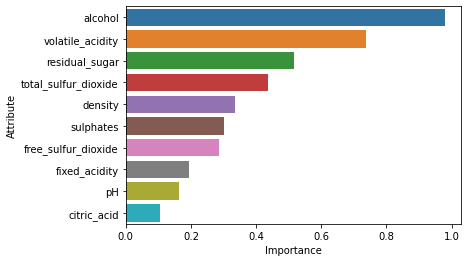

In [276]:
a = results.params[1:].values

features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': abs(a)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x = 'Importance', y = 'Attribute', data = features_importances)

**Wine 'sweetness'**<br>

We can create a column to address the `sweetness` of the wine. According to the [Commission Delegated Regulation (EU) 2019/33](https://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32019R0033&from=en) that regulates the wine sector, applying the terms dry, medium dry, medium sweet or sweet require the following criteria:

**Dry:**<br>
If its sugar content does not exceed:<br>
&ensp;- 4 g$\cdot$dm<sup>-3</sup>, or<br>
&ensp;- 9 g$\cdot$dm<sup>-3</sup>, provided that the total acidity is not more than 2 grams below the residual sugar content.<br>

**Medium dry:**<br>
If its sugar content exceeds the maximum permitted but does not exceed:<br>
&ensp;- 12 g$\cdot$dm<sup>-3</sup>, or<br>
&ensp;- 18 g$\cdot$dm<sup>-3</sup>, provided that the total acidity is not more than 10 grams below the residual sugar content.<br>

**Medium sweet:**<br>
&ensp;If its sugar content exceeds the maximum permitted but does not exceed 45 g$\cdot$dm<sup>-3</sup>.<br>

**Sweet:**<br>
&ensp;If its sugar content is of at least 45 g$\cdot$dm<sup>-3</sup>.<br>

Let's apply these to our data:

In [62]:
#def sweet_or_dry(x):
#    if (x['residual_sugar'] < 4) | (x['residual_sugar'] < 9 and (x['residual_sugar'] - x['fixed_acidity']) < 2):
#        return 'dry'
#    elif (x['residual_sugar'] < 12) | (x['residual_sugar'] < 18 and (x['residual_sugar'] - x['fixed_acidity']) < 10):
#        return 'medium_dry'
#    elif (x['residual_sugar'] < 45):
#        return 'medium_sweet'
#    else:
#        return 'sweet'

In [63]:
#wine_df['sweetness'] = wine_df.apply(lambda x: sweet_or_dry(x), axis=1)
#wine_df['sweetness'].value_counts(normalize=True)

The data is totally inbalaced: dry wines correspond to over 77% of the total. Instead of having the other categories, we could further group them into 'sweet' (as opposed to 'dry', not taking into account the formal definition).

In [64]:
#wine_df['sweetness'] = wine_df['sweetness'].apply(lambda x: 'dry' if x == 'dry' else 'sweet')
#wine_df['sweetness'].value_counts(normalize=True)

In [65]:
#wine_df['sweetness_encoded'] = wine_df['sweetness'].apply(lambda x: 0 if x == 'dry' else 1)

**Future improvements:**

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

1. Use classification models such as Random Forests
2. Deal with the class imbalancement